In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [3]:
#coordinates

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

626

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=86910c1ca931ac11748548454a2b2666


In [8]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=86910c1ca931ac11748548454a2b2666&q=Boston


In [9]:
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [10]:
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":800,"main":"Clear","description":"clear sky","icon":"01n"}],"base":"stations","main":{"temp":56.25,"feels_like":55.76,"temp_min":51.1,"temp_max":60.49,"pressure":1023,"humidity":89},"visibility":10000,"wind":{"speed":1.68,"deg":301,"gust":1.77},"clouds":{"all":0},"dt":1632108913,"sys":{"type":2,"id":2001997,"country":"US","sunrise":1632047319,"sunset":1632091640},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [11]:
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 56.25,
  'feels_like': 55.76,
  'temp_min': 51.1,
  'temp_max': 60.49,
  'pressure': 1023,
  'humidity': 89},
 'visibility': 10000,
 'wind': {'speed': 1.68, 'deg': 301, 'gust': 1.77},
 'clouds': {'all': 0},
 'dt': 1632108913,
 'sys': {'type': 2,
  'id': 2001997,
  'country': 'US',
  'sunrise': 1632047319,
  'sunset': 1632091640},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [12]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [13]:
# Get the JSON data.
boston_data = city_weather.json()

In [14]:
boston_data

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 56.25,
  'feels_like': 55.76,
  'temp_min': 51.1,
  'temp_max': 60.49,
  'pressure': 1023,
  'humidity': 89},
 'visibility': 10000,
 'wind': {'speed': 1.68, 'deg': 301, 'gust': 1.77},
 'clouds': {'all': 0},
 'dt': 1632108913,
 'sys': {'type': 2,
  'id': 2001997,
  'country': 'US',
  'sunrise': 1632047319,
  'sunset': 1632091640},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [15]:
boston_data['sys']

{'type': 2,
 'id': 2001997,
 'country': 'US',
 'sunrise': 1632047319,
 'sunset': 1632091640}

In [16]:
boston_data['sys']['country']

'US'

In [17]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 60.49 89 0 1.68


In [18]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)


datetime.datetime(2021, 9, 20, 3, 35, 13)

In [26]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    try:
        print(i,city)
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | manadhoo
0 manadhoo
Processing Record 2 of Set 1 | boatlaname
1 boatlaname
City not found. Skipping...
Processing Record 3 of Set 1 | wattegama
2 wattegama
Processing Record 4 of Set 1 | tura
3 tura
Processing Record 5 of Set 1 | hermanus
4 hermanus
Processing Record 6 of Set 1 | butaritari
5 butaritari
Processing Record 7 of Set 1 | tumannyy
6 tumannyy
City not found. Skipping...
Processing Record 8 of Set 1 | atuona
7 atuona
Processing Record 9 of Set 1 | ruatoria
8 ruatoria
City not found. Skipping...
Processing Record 10 of Set 1 | geraldton
9 geraldton
Processing Record 11 of Set 1 | albany
10 albany
Processing Record 12 of Set 1 | punta arenas
11 punta arenas
Processing Record 13 of Set 1 | saleaula
12 saleaula
City not found. Skipping...
Processing Record 14 of Set 1 | sarangani
13 sarangani
Processing Record 15 of Set 1 | atocha
14 atocha
Processing Record 16 of Set 1 | tarakan
15 tarakan

In [27]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Manadhoo,5.7667,73.3833,82.45,77,52,8.68,MV,2021-09-20 03:46:56
1,Wattegama,6.7989,81.4808,85.12,56,76,4.54,LK,2021-09-20 03:46:57
2,Tura,25.5198,90.2201,81.36,75,49,4.92,IN,2021-09-20 03:46:57
3,Hermanus,-34.4187,19.2345,58.80,83,38,18.01,ZA,2021-09-20 03:46:58
4,Butaritari,3.0707,172.7902,83.30,66,4,11.61,KI,2021-09-20 03:46:58
5,Atuona,-9.8000,-139.0333,78.12,75,13,21.32,PF,2021-09-20 03:46:59
6,Geraldton,-28.7667,114.6000,79.21,34,0,19.57,AU,2021-09-20 03:46:59
7,Albany,42.6001,-73.9662,55.45,90,0,1.99,US,2021-09-20 03:43:10
8,Punta Arenas,-53.1500,-70.9167,39.31,75,20,5.75,CL,2021-09-20 03:47:00
9,Sarangani,5.4033,125.4636,81.59,71,100,10.29,PH,2021-09-20 03:47:01


In [28]:
# Reorder columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [29]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Manadhoo,MV,2021-09-20 03:46:56,5.7667,73.3833,82.45,77,52,8.68
1,Wattegama,LK,2021-09-20 03:46:57,6.7989,81.4808,85.12,56,76,4.54
2,Tura,IN,2021-09-20 03:46:57,25.5198,90.2201,81.36,75,49,4.92
3,Hermanus,ZA,2021-09-20 03:46:58,-34.4187,19.2345,58.80,83,38,18.01
4,Butaritari,KI,2021-09-20 03:46:58,3.0707,172.7902,83.30,66,4,11.61
5,Atuona,PF,2021-09-20 03:46:59,-9.8000,-139.0333,78.12,75,13,21.32
6,Geraldton,AU,2021-09-20 03:46:59,-28.7667,114.6000,79.21,34,0,19.57
7,Albany,US,2021-09-20 03:43:10,42.6001,-73.9662,55.45,90,0,1.99
8,Punta Arenas,CL,2021-09-20 03:47:00,-53.1500,-70.9167,39.31,75,20,5.75
9,Sarangani,PH,2021-09-20 03:47:01,5.4033,125.4636,81.59,71,100,10.29


In [30]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [31]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]
print(max_temps)

0      82.45
1      85.12
2      81.36
3      58.80
4      83.30
       ...  
572    85.33
573    77.05
574    63.39
575    78.53
576    48.00
Name: Max Temp, Length: 577, dtype: float64


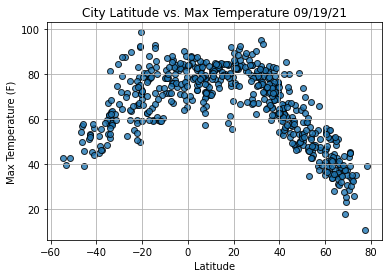

In [32]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

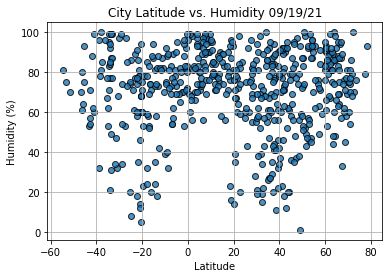

In [33]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

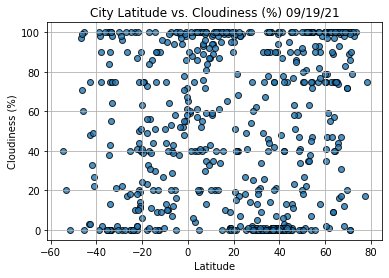

In [34]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

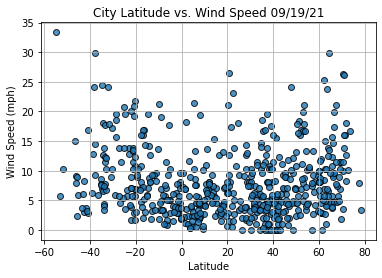

In [35]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()